In [121]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop, SGD


In [122]:
print(tf.version)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


<module 'tensorflow._api.v2.version' from 'C:\\Users\\Miguel\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>
Num GPUs Available:  1


In [123]:
#Cargamos el dataset
import pathlib
data_dir = r"C:\Users\Miguel\OneDrive - Universidad de Oviedo\TFG\Bases de datos\ICHBI\DATASETS\CICLOS_BUTTER\Balanceado_4clases\dataset"
data_dir = pathlib.Path(data_dir)


In [124]:
#comprobamos que esta cargado correctamente
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)


2000


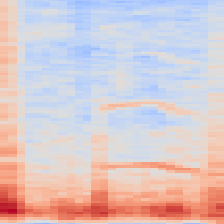

In [125]:
#obtenemos un ejemplo
crackles = list(data_dir.glob('both/*'))
PIL.Image.open(str(crackles[0]))


In [126]:
altura_imagen, anchura_imagen = 224, 224
batch_size = 64
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2 ,
    subset="training",
    seed=17,
    label_mode='categorical',
    image_size=(altura_imagen, anchura_imagen),
    batch_size=batch_size)


Found 2000 files belonging to 4 classes.
Using 1600 files for training.


In [127]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2 ,
    subset="validation",
    seed=17,
    label_mode='categorical',
    image_size=(altura_imagen, anchura_imagen),
    batch_size=batch_size)


Found 2000 files belonging to 4 classes.
Using 400 files for validation.


In [128]:
class_names = train_ds.class_names
print(class_names)


['both', 'crackles', 'empty', 'wheezes']


In [129]:
vgg_model= Sequential()

pretrained_model = tf.keras.applications.VGG16(include_top=False, input_shape=(224, 224, 3), pooling='avg', classes=4 , weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False

vgg_model.add(pretrained_model)

#############Base################
#vgg_model.add(Flatten())
#vgg_model.add(Dense(1024, activation='relu'))
#################################

#############2D2Drop##############
#vgg_model.add(Flatten())
#vgg_model.add(Dense(128, activation='relu'))
#vgg_model.add(Dropout(0.5))
#vgg_model.add(Dense(128, activation='relu'))
#vgg_model.add(Dropout(0.5))
###################################

##########Progresivo#############
vgg_model.add(Dense(2048, activation='relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(1024, activation='relu'))
vgg_model.add(Dropout(0.25))
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dropout(0.1))
##################################


vgg_model.add(Dense(4, activation='softmax'))


In [130]:
vgg_model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_23 (Dense)             (None, 2048)              1050624   
_________________________________________________________________
dropout_12 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)              

In [131]:
vgg_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='categorical_crossentropy', metrics=['accuracy'])


In [132]:
epochs = 100 
history = vgg_model.fit(train_ds, validation_data=val_ds, epochs=epochs)


Epoch 1/100
25/25 [==============================] - 5s 198ms/step - loss: 2.6747 - accuracy: 0.2675 - val_loss: 1.3611 - val_accuracy: 0.3225
Epoch 2/100
25/25 [==============================] - 5s 189ms/step - loss: 1.3612 - accuracy: 0.3231 - val_loss: 1.2890 - val_accuracy: 0.3875
Epoch 3/100
25/25 [==============================] - 4s 166ms/step - loss: 1.2877 - accuracy: 0.3881 - val_loss: 1.2298 - val_accuracy: 0.3975
Epoch 4/100
25/25 [==============================] - 4s 156ms/step - loss: 1.2401 - accuracy: 0.4456 - val_loss: 1.2536 - val_accuracy: 0.4125
Epoch 5/100
25/25 [==============================] - 4s 157ms/step - loss: 1.1862 - accuracy: 0.4638 - val_loss: 1.2142 - val_accuracy: 0.4125
Epoch 6/100
25/25 [==============================] - 4s 157ms/step - loss: 1.1475 - accuracy: 0.4681 - val_loss: 1.2505 - val_accuracy: 0.4525
Epoch 7/100
25/25 [==============================] - 4s 157ms/step - loss: 1.1348 - accuracy: 0.4825 - val_loss: 1.1846 - val_accuracy: 0.4650

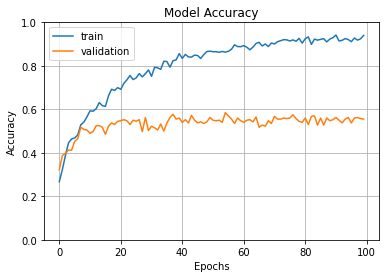

In [133]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.0, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


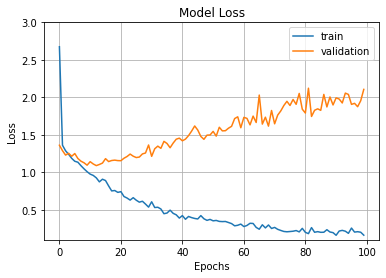

In [134]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0.1, ymax=3)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


In [135]:
vgg_model.save(
    r'C:\Users\Miguel\OneDrive - Universidad de Oviedo\TFG\Bases de datos\Codigo\ModelosEntrenados\VGG16_Balanced4_Butter_Prog_80_20.h5')
